<a href="https://colab.research.google.com/github/dscohen75/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Copy_of_LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [1]:
import pandas as pd

In [2]:
dev = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

print(dev.shape)
dev.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


In [9]:
import numpy as np
import matplotlib.pyplot as plt



**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [ ]:
sample_20 = dev.sample(20, random_state=42)

sample_200 = dev.sample(200, random_state=42)
 
sample_20

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [4]:
sample_mean20 = sample_20['ConvertedSalary'].mean()
sample_mean20

55752.2

In [5]:
sample_mean200 = sample_200['ConvertedSalary'].mean()
sample_mean200

68551.255

## Just out of curiosity, we can peek "under the hood" and see the true of our population since it is finite and known:

In [15]:
true_mean_salary = dev['ConvertedSalary'].mean()
true_mean_salary

73453.40420137631

In [17]:
median_salary = dev['ConvertedSalary'].median()
median_salary

65340.0

## It seems our sample is a bit skewed, due to a few salaries that are probably much larger than the rest:

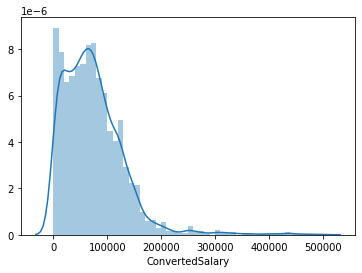

In [24]:
import seaborn as sns

sns.distplot(dev['ConvertedSalary']);

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

## The estimate that is calculated from the larger sample is likely to be closer to the true mean of the whole population, because of the Central Limit Theorem:  Since the distribution of the sample mean converges to a normal distribution, the sample mean converges to the population mean, as n gets very large. 

## A non-technical audience might have an intuition that a larger sample size would give you more reliable information, but would likely not appreciate the difference that a sample size of 200 makes compared with a sample size of 20, which is really quite small. 

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

## No.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



## We should report the margin of error and what that represents, or a confidence interval with a level of confidence. We should also explain in plain English what this interval really tells us.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [7]:
from scipy import stats

def confidence_interval(sample, confidence_level=0.95):
  # make sure that our input is a numpy array
  sample = np.array(sample)
  # sample mean
  x_bar = np.mean(sample)
  # Sample std - needs ddof specified as 1 instead of the default 0;
  # indicates to numpy that we want the sample std and not the population parameter.
  s = np.std(sample, ddof=1)
  # sample size
  n = len(sample)
  # t-statistic for our sample at our desired confidence level
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)

  std_err = s / np.sqrt(n)

  moe = t * std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return(lower_bound, x_bar, upper_bound, moe)


In [11]:
ci_20 = confidence_interval(sample_20['ConvertedSalary'])
ci_20

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [13]:
ci_200 = confidence_interval(sample_200['ConvertedSalary'])
ci_200

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

**2) Which confidence interval is wider and why?**

## The confidence interval calculated from the smaller sample size is wider, because the standard error of the mean is larger (and the t-statistic is slightly larger as well).

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

## The sample mean for the sample of size 20 is 55,752.20, and the margin of error is 19,947.10. 
## The sample mean for the sample of size 200 is 68,551.26, and the margin of error is 7958.20.
## The margin of error represents the interval that if taken above and below the sample mean, will capture the true mean of the population for 95% of random samples of this same size taken from this population. 

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

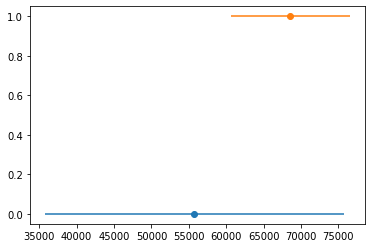

In [14]:
plt.errorbar(ci_20[1], y=0, xerr=ci_20[3], fmt='o')
plt.errorbar(ci_200[1], y=1, xerr=ci_200[3], fmt='o')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

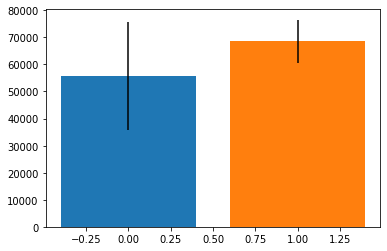

In [20]:
plt.bar(x=0, height=ci_20[1], yerr=ci_20[3])

plt.bar(x=1, height=ci_200[1], yerr=ci_200[3])
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [21]:
ci_mean_complete = confidence_interval(dev['ConvertedSalary'])
ci_mean_complete

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

## When we use the entire data set, we are just calculating the mean of this population just as the .describe() function does. This mean is also an estimate of the theoretical mean salary of ALL students of bootcamps/developer programs. The margin of error now allows us to build a 95% confidence interval around this mean, relating it to the larger population from which this data set was drawn.

In [22]:
dev.describe()

,Unnamed: 0,ConvertedSalary
count,2761.000000,2761.000000
mean,41208.962332,73453.404201
std,23947.027421,57710.453235
min,62.000000,0.000000
25%,20096.000000,32628.000000
50%,40573.000000,65340.000000
75%,62085.000000,100000.000000
max,87131.000000,499344.000000


## It's worth noting again how far apart the mean and the median are for this population. The median may be a more informative statistic if we want to summarize the information in this dataset, but it's probably harder to build a confidence interval for the sample median...

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

## A statistical estimator is said to be accurate, or unbiased, if the estimate is centered around the true theoretical parameter that it is trying to estimate, when repeated sampling is performed.

## The precision of an estimator is a measure of the spread or variability in the calculated estimate, depending on the sample size or with repeated sampling. 


**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

## A 95% confidence interval is an interval centered on our samle estimate of a population parameter, which will capture the true value of the population parameter in 95% of random samples of the same size that we take from that population.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

## When doing a t-test, if the hypothesized mean of a population falls outside the 95% confidence interval generated by our sample, this is equivalent to the sample producing a t-statistic with a p-value < 0.05. It makes sense that if the 95% confidence interval generated by our data does not contain our hypothesized population mean, we would reject the hypothsis that the mean is of this value.

## For today's dataset from the 2018 Stack Overflow Survey, let's test the hypothesis that the data are normally distributed. For this to be true, it would need to be the case that the population mean equals the population median. We'll use the sample median to estimate the population median. 

## We've seen above that the 95% confidence interval for the population mean, generated by using the entire data set, is (71299.83, 75606.98).
## But the sample median is 65340, which lies outside of this confidence interval. 

## So the hypothesis that we want to test is H0: The population mean = 65340, and H1: The population mean is not equal to 65340.

In [25]:
stats.ttest_1samp(dev['ConvertedSalary'], 65340)

Ttest_1sampResult(statistic=7.387233570889253, pvalue=1.9755641320117753e-13)

## This p-value is way outside of our 95% confidnce interval, which is the same thing as saying that at the 0.05 signficance level we reject the hypothesis that the mean of the distribution from which this population was drawn is the same as the median. 
## In other words, these salary data are not normally distributed. With a smaller sample size, this would call into question the validity of a t-test, but our sample is big enough not to worry about that.